# Exercício

**Exercício: Prever o preço dos diamantes**

**Arquivo diamonds.csv**

__KNN__:
1. Testar outros valores de k e outras métricas de distância
2. Rodar o KNN apenas utilizando os atributos que estão altamente correlacionados com o preço

Ou

__Regressão Linear__:
1. Testar a predição utilizando o modelo de regressão linear (`LinearRegression`)


**Exercício: Classificação de Espécies de Flores**

**Arquivo wisconsing breast cancer** 

**Passos:**

   1. Carregue o conjunto de dados em um DataFrame usando a biblioteca pandas.
   2. Explore e visualize os dados para entender suas características.
   3. Divida os dados em recursos (X) e rótulos (y).
   4. Divida o conjunto de dados em conjuntos de treinamento e teste.
   
1. Caso use árvore de decisão:
   1. Importe a classe `DecisionTreeClassifier` da biblioteca scikit-learn.
   2. Inicialize o modelo de árvore de decisão.
   3. Treine o modelo usando o conjunto de treinamento.
   4. Faça previsões usando o conjunto de teste.
   5. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
   6.  Visualize a árvore de decisão resultante (opcional).
   
2. Caso use KNN:
   1. Importe a classe `KNeighborsClassifier` da biblioteca scikit-learn.
   2. Inicialize o modelo k-NN com um valor de k desejado.
   3. Treine o modelo usando o conjunto de treinamento.
   4. Faça previsões usando o conjunto de teste.
   5. Avalie o desempenho do modelo usando métricas como acurácia, matriz de confusão, etc.
   6. Experimente diferentes valores de k e avalie como eles afetam o desempenho.

### Matriz de confusão

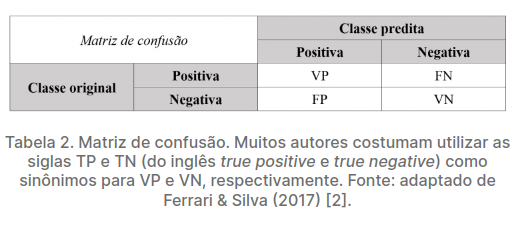

## Configs

### Imports

In [434]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, \
    mean_squared_error,mean_absolute_error, mean_absolute_percentage_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor, KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz

### Functions

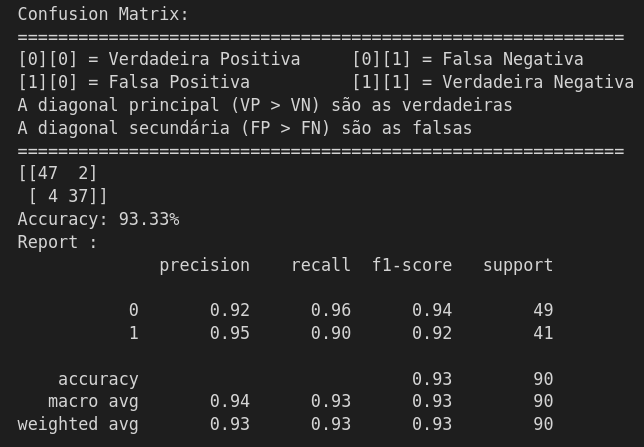

In [435]:
# Função para avaliar acurácia comparando a predição (y_pred) com o target (y_test)
def results(y_test_, y_pred_):
    results = confusion_matrix(y_test_, y_pred_)
    line = '='*60
    print('Confusion Matrix:')
    print(line)
    print('[0][0] = Verdadeira Positiva \t [0][1] = Falsa Negativa')
    print('[1][0] = Falsa Positiva \t [1][1] = Verdadeira Negativa')
    print('A diagonal principal (VP > VN) são as verdadeiras')
    print('A diagonal secundária (FP > FN) são as falsas')
    print(line)
    
    print(results)
    
    accuracy = accuracy_score(y_test_, y_pred_)
    
    print("Accuracy: %.2f%%" % (accuracy * 100.0))
    print(line)
    
    print ('Report:')

    print('recall [sensibilidades]: capacidade do método de detectar com sucesso resultados classificados como positivos > VP/(VP+FN)')
    print('precision [precisão]: quantidade de valores positivos acertados sobre a soma de todos os valores positivos > VP/(VP+FP)')
    # print('support? [especificidade]: capacidade do método de detectar com sucesso resultados classificados como negativos > VN/(VN+FP)')
    print('f1-score: média harmônica calculada entre a precisão e a sensibilidade.')



    print (classification_report(y_test_, y_pred_))


def results_regression(y_test_, y_pred_):
    mse = mean_squared_error(y_test_, y_pred_)
    print(f"mse: {mse}")
    
    rmse = math.sqrt(mse)
    print(f"rmse: {rmse}")
    
    mae = mean_absolute_error(y_test_, y_pred_)
    print(f"mae: {mae}")
    
    mape = mean_absolute_percentage_error(y_test_, y_pred_)
    print(f"mape: {mape}")
    
    r2 = r2_score(y_test_, y_pred_)
    print(f"r2_score {r2}")

## Regressão

In [436]:
# Load
diamons = pd.read_csv('./../../Datasets/diamonds.csv')

# Drop unused cols
diamons.drop(diamons.columns[0], axis=1, inplace=True)

diamons

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [437]:
# check duplicates
print("Duplicated values before drop: ", diamons.duplicated().sum())
diamons.drop_duplicates(keep='first', inplace=True)
print("Duplicated values after drop: ", diamons.duplicated().sum())

Duplicated values before drop:  146
Duplicated values after drop:  0


In [438]:
# Check missing values
print("Missing values: ", diamons.isnull().sum().sum())

Missing values:  0


In [439]:
# label encoder
le = LabelEncoder()
for column in diamons.columns:
    if(diamons[column].dtypes=='object'):
        diamons[column] = le.fit_transform(diamons[column])
        
print("After label encode: ")
diamons

After label encode: 


,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [440]:
# correlações
matrix = diamons.corr()
matrix.style.background_gradient(cmap='coolwarm')

,carat,cut,color,clarity,depth,table,price,x,y,z
carat,1.000000,0.017785,0.291019,-0.214068,0.027861,0.181091,0.921548,0.975380,0.951908,0.953542
cut,0.017785,1.000000,0.000393,0.028141,-0.193184,0.150366,0.040196,0.022592,0.027805,0.002442
color,0.291019,0.000393,1.000000,-0.028002,0.047572,0.026102,0.171825,0.269876,0.263153,0.267825
clarity,-0.214068,0.028141,-0.028002,1.000000,-0.053165,-0.088074,-0.071218,-0.225575,-0.217459,-0.224117
depth,0.027861,-0.193184,0.047572,-0.053165,1.000000,-0.297669,-0.011048,-0.025348,-0.029389,0.094757
table,0.181091,0.150366,0.026102,-0.088074,-0.297669,1.000000,0.126566,0.194855,0.183231,0.150270
price,0.921548,0.040196,0.171825,-0.071218,-0.011048,0.126566,1.000000,0.884504,0.865395,0.861208
x,0.975380,0.022592,0.269876,-0.225575,-0.025348,0.194855,0.884504,1.000000,0.974592,0.970686
y,0.951908,0.027805,0.263153,-0.217459,-0.029389,0.183231,0.865395,0.974592,1.000000,0.951844
z,0.953542,0.002442,0.267825,-0.224117,0.094757,0.150270,0.861208,0.970686,0.951844,1.000000


In [441]:
# Linear regression
# Pela visão inicial as variáveis que parecem ter correlação são 

# Regressão linear para saber o preço a partir das outras 4 features
y = diamons['price']
X = diamons.drop(columns=['price'], axis=1)

display(len(X), len(y), X[:5], y.iloc[:5])


53794

53794

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75


0    326
1    326
2    327
3    334
4    335
Name: price, dtype: int64

In [442]:
# split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [443]:
def compute_linear_regression(X_train_, X_test_, y_train_, y_test_):
    
    # Treinar o modelo usando LinearRegression
    linear_regression = LinearRegression()
    linear_regression.fit(X_train_, y_train_)

    # Obter predições a partir do conjunto de dados treinamento
    y_pred = linear_regression.predict(X_test_)

    results_regression(y_test_, y_pred)

In [444]:
compute_linear_regression(X_train, X_test, y_train, y_test)

mse: 1722518.018368221
rmse: 1312.4473392743118
mae: 840.7447516231455
mape: 0.36997253515202805
r2_score 0.8869892348179879


In [445]:
# KNN
knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
model_KNN = knn.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

In [446]:
results_regression(y_test, y_pred)

mse: 800802.5381094897
rmse: 894.8757109842069
mae: 477.6182544846176
mape: 0.13618795870574146
r2_score 0.9474610386501601


In [447]:
# testar apenas os que estão bem correlacionados com o preço

X_train, X_test, y_train, y_test = train_test_split(X[['carat', 'x', 'y', 'z']], y, test_size=0.20, random_state=42)

knn = KNeighborsRegressor(n_neighbors=5, algorithm='auto')
model_KNN = knn.fit(X_train, y_train)
y_pred = model_KNN.predict(X_test)

In [448]:
results_regression(y_test, y_pred)

mse: 2034366.967324101
rmse: 1426.3123666729182
mae: 805.3830281624686
mape: 0.20694582965394617
r2_score 0.8665294846343027


In [449]:
df = pd.read_csv('./../../Datasets/wisconsin_breast_cancer.csv')
# target = 0 - benignat, 1 = malignant
df.drop(df.columns[0], axis=1, inplace=True)
df

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
0,5,1,1,1,2,1.0,3,1,1,0
1,5,4,4,5,7,10.0,3,2,1,0
2,3,1,1,1,2,2.0,3,1,1,0
3,6,8,8,1,3,4.0,3,7,1,0
4,4,1,1,3,2,1.0,3,1,1,0
...,...,...,...,...,...,...,...,...,...,...
694,3,1,1,1,3,2.0,1,1,1,0
695,2,1,1,1,2,1.0,1,1,1,0
696,5,10,10,3,7,3.0,8,10,2,1
697,4,8,6,4,3,4.0,10,6,1,1


In [450]:
df.dtypes

thickness      int64
size           int64
shape          int64
adhesion       int64
single         int64
nuclei       float64
chromatin      int64
nucleoli       int64
mitosis        int64
class          int64
dtype: object

In [451]:
print("Duplicated values before drop: ", df.duplicated().sum())
df.drop_duplicates(keep='first', inplace=True)
print("Duplicated values after drop: ", df.duplicated().sum())

Duplicated values before drop:  236
Duplicated values after drop:  0


In [452]:
df.isnull().sum()

thickness     0
size          0
shape         0
adhesion      0
single        0
nuclei       14
chromatin     0
nucleoli      0
mitosis       0
class         0
dtype: int64

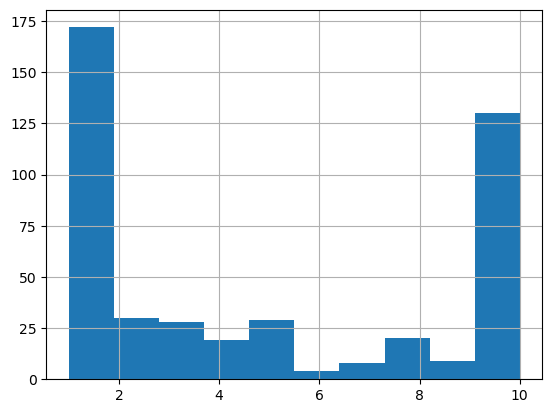

In [453]:
df.nuclei.hist()
plt.show()

In [454]:
# Opção 1: preencher campos vazíos com a mediana
# df['nuclei'].fillna(df.nuclei.median(), inplace=True)

# Opção 2: preencher campos vazíos com a média
# df['nuclei'].fillna(df.nuclei.mean(), inplace=True)

# Opçãoa 3: excluír os campos vazíos [MELHOR RESULTADO]
df.dropna(axis=0, inplace=True)

In [455]:
print('Missing values: ', df.isnull().sum().sum())

Missing values:  0


In [456]:
# Show calss balance
df['class'].value_counts()

1    236
0    213
Name: class, dtype: int64

### Análise

In [457]:
matrix_df = df.corr()
matrix_df.style.background_gradient(cmap='coolwarm')

# aparentemen há várias variaveis que tem alta correlação

,thickness,size,shape,adhesion,single,nuclei,chromatin,nucleoli,mitosis,class
thickness,1.000000,0.570750,0.584082,0.379143,0.429917,0.508838,0.485863,0.444267,0.294359,0.670230
size,0.570750,1.000000,0.876916,0.638499,0.689472,0.590451,0.710705,0.650262,0.403411,0.758697
shape,0.584082,0.876916,1.000000,0.612859,0.650156,0.618310,0.684466,0.650739,0.381447,0.759500
adhesion,0.379143,0.638499,0.612859,1.000000,0.517930,0.590790,0.610571,0.510035,0.356659,0.630415
single,0.429917,0.689472,0.650156,0.517930,1.000000,0.479915,0.554047,0.555774,0.434059,0.611432
nuclei,0.508838,0.590451,0.618310,0.590790,0.479915,1.000000,0.607716,0.478238,0.258691,0.760278
chromatin,0.485863,0.710705,0.684466,0.610571,0.554047,0.607716,1.000000,0.604527,0.278639,0.706738
nucleoli,0.444267,0.650262,0.650739,0.510035,0.555774,0.478238,0.604527,1.000000,0.373095,0.645257
mitosis,0.294359,0.403411,0.381447,0.356659,0.434059,0.258691,0.278639,0.373095,1.000000,0.357184
class,0.670230,0.758697,0.759500,0.630415,0.611432,0.760278,0.706738,0.645257,0.357184,1.000000


In [458]:
y = df['class']
X = df.drop('class', axis=1)

In [459]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [460]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

y_pred = decision_tree.predict(X_test)
results(y_test, y_pred)


Confusion Matrix:
[0][0] = Verdadeira Positiva 	 [0][1] = Falsa Negativa
[1][0] = Falsa Positiva 	 [1][1] = Verdadeira Negativa
A diagonal principal (VP > VN) são as verdadeiras
A diagonal secundária (FP > FN) são as falsas
[[45  4]
 [ 3 38]]
Accuracy: 92.22%
Report:
recall [sensibilidades]: capacidade do método de detectar com sucesso resultados classificados como positivos > VP/(VP+FN)
precision [precisão]: quantidade de valores positivos acertados sobre a soma de todos os valores positivos > VP/(VP+FP)
f1-score: média harmônica calculada entre a precisão e a sensibilidade.
              precision    recall  f1-score   support

           0       0.94      0.92      0.93        49
           1       0.90      0.93      0.92        41

    accuracy                           0.92        90
   macro avg       0.92      0.92      0.92        90
weighted avg       0.92      0.92      0.92        90



In [461]:
# Plotar as regras
dot_data = export_graphviz(decision_tree, out_file=None, \
                            feature_names=X.columns, class_names=['Benignant', 'Malignant'], \
                            filled=True, rounded=True, \
                            special_characters=True)

In [462]:
import graphviz

graph = graphviz.Source(dot_data)
graph.render("breast_cancer")

'breast_cancer.pdf'

In [463]:
# graph

## KNN

In [464]:
# Inicial o modelo k-NN
k=3
knn = KNeighborsClassifier(n_neighbors=k)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

results(y_test, y_pred)


Confusion Matrix:
[0][0] = Verdadeira Positiva 	 [0][1] = Falsa Negativa
[1][0] = Falsa Positiva 	 [1][1] = Verdadeira Negativa
A diagonal principal (VP > VN) são as verdadeiras
A diagonal secundária (FP > FN) são as falsas
[[47  2]
 [ 2 39]]
Accuracy: 95.56%
Report:
recall [sensibilidades]: capacidade do método de detectar com sucesso resultados classificados como positivos > VP/(VP+FN)
precision [precisão]: quantidade de valores positivos acertados sobre a soma de todos os valores positivos > VP/(VP+FP)
f1-score: média harmônica calculada entre a precisão e a sensibilidade.
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        49
           1       0.95      0.95      0.95        41

    accuracy                           0.96        90
   macro avg       0.96      0.96      0.96        90
weighted avg       0.96      0.96      0.96        90



Neste caso temos uma acurácia de 93.33%, sendo que:
* a predição disse que 51 (VP+FP) seriam positivos (benignos), porém 47 (VP) foram benignos e 4 (FP) malignos (errou 4)
* a predição disse que 39 (FN+VN) casos seriam negativos (malignos), porém 37 (VN) foram e 2 (FN) não (errou 2)
* ao todo foral avaliados 90 casos (51 + 39)
* a diagonal principal mostra os acertos
* 